In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv
/kaggle/input/santander-customer-satisfaction/sample_submission.csv


# Importando dados

In [2]:
def cria_e_arruma_df(fonte):
    df = pd.read_csv(fonte)
    print('O tamanho do arquivo é:',len(df))
    df = df.set_index('ID')
    return df

In [3]:
s_subm = cria_e_arruma_df('../input/santander-customer-satisfaction/sample_submission.csv')#; s_subm.head(2)
print('----')
dados_test = cria_e_arruma_df('../input/santander-customer-satisfaction/test.csv')#; dados_test.head(2)
print('----')
dados_train = cria_e_arruma_df('../input/santander-customer-satisfaction/train.csv')
dados_train.head(2)

O tamanho do arquivo é: 75818
----
O tamanho do arquivo é: 75818
----
O tamanho do arquivo é: 76020


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0


# Limpeza de dados

## Mudança de tipos

In [4]:
def turn_to_float(dados): # Torna todos os dados float
    print('antes do tratamento:', dados.dtypes.value_counts()[1])
    for i in range(len(dados.columns)):
        dados[dados.columns[i]] = dados[dados.columns[i]].astype('float64')
    print('depois do tratamento:', dados.dtypes.value_counts()[0])
    return dados

In [5]:
dtrain_flt = turn_to_float(dados_train)
print('----')
dtest_flt = turn_to_float(dados_test)
dtest_flt.head(3)

antes do tratamento: 111
depois do tratamento: 370
----
antes do tratamento: 110
depois do tratamento: 369


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


## Verificando missing

In [6]:
na_number = dtrain_flt.isna().sum()
na_number.value_counts() #Não há valores missing em TRAIN

0    370
dtype: int64

In [7]:
na_number = dtest_flt.isna().sum()
na_number.value_counts() #Não há valores missing em TESTE

0    369
dtype: int64

## Separação do treino em X e Y

In [8]:
dtrain_flt_X = dtrain_flt.drop("TARGET", 1) # Matriz de características
dtrain_flt_Y = dtrain_flt["TARGET"] # Variável alvo
dtrain_flt_Y.head(3)

ID
1    0.0
3    0.0
4    0.0
Name: TARGET, dtype: float64

> ## ML - Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [11]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(dtrain_flt_X, dtrain_flt_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [12]:
clf.feature_importances_

array([0.02, 0.13, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.02, 0.01, 0.02, 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [13]:
clf.score(dtrain_flt_X, dtrain_flt_Y)

0.9602867666403578

In [18]:
clf.predict(dtest_flt)

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
prob_insatisfacao = clf.predict_proba(dtest_flt)

array([0.49412685, 0.49424606, 0.48425491, ..., 0.48345983, 0.49287292,
       0.48305477])

In [28]:
dtest_flt['Prob_Ins'] = prob_insatisfacao = clf.predict_proba(dtest_flt)[:,1]

In [29]:
dtest_flt['Prob_Ins'] #probabilidade de insatisfação

ID
2         0.494127
5         0.494246
6         0.484255
7         0.489358
9         0.485112
            ...   
151831    0.490561
151832    0.489501
151833    0.483460
151834    0.492873
151837    0.483055
Name: Prob_Ins, Length: 75818, dtype: float64

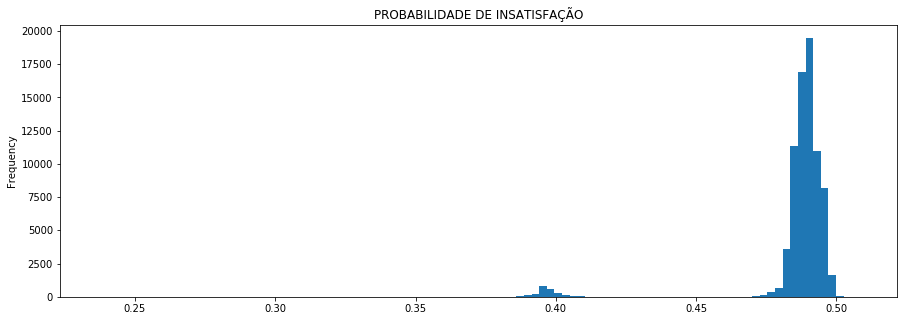

In [43]:
dtest_flt['Prob_Ins'].plot(kind='hist', bins=100, figsize=(15, 5), title='PROBABILIDADE DE INSATISFAÇÃO')